In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('covertype.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354301 entries, 0 to 354300
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           354301 non-null  int64  
 1   Aspect                              354301 non-null  int64  
 2   Slope                               354301 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    354301 non-null  int64  
 4   Vertical_Distance_To_Hydrology      354300 non-null  float64
 5   Horizontal_Distance_To_Roadways     354300 non-null  float64
 6   Hillshade_9am                       354300 non-null  float64
 7   Hillshade_Noon                      354300 non-null  float64
 8   Hillshade_3pm                       354300 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  354300 non-null  float64
 10  Wilderness_Area                     354300 non-null  float64
 11  Soil_Type1                

In [3]:
data.isna().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,1
Horizontal_Distance_To_Roadways,1
Hillshade_9am,1


In [4]:
data = data.fillna(data.mode().iloc[0])

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354301 entries, 0 to 354300
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           354301 non-null  int64  
 1   Aspect                              354301 non-null  int64  
 2   Slope                               354301 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    354301 non-null  int64  
 4   Vertical_Distance_To_Hydrology      354301 non-null  float64
 5   Horizontal_Distance_To_Roadways     354301 non-null  float64
 6   Hillshade_9am                       354301 non-null  float64
 7   Hillshade_Noon                      354301 non-null  float64
 8   Hillshade_3pm                       354301 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  354301 non-null  float64
 10  Wilderness_Area                     354301 non-null  float64
 11  Soil_Type1                

In [7]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']
y_zero_based = y - 1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_zero_based, test_size=0.2, random_state=42)

In [9]:
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(1, 5)] + \
    [f'Soil_Type_{i}' for i in range(1, 41)] + ['Cover_Type']

In [10]:
numerical_features = columns[:10]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [11]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=7, n_jobs=-1)

In [12]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [16]:
rf_train_pred_original = rf_train_pred + 1
rf_test_pred_original = rf_test_pred + 1

In [13]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_class=7, ...)

In [14]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

In [17]:
xgb_train_pred_original = xgb_train_pred + 1
xgb_test_pred_original = xgb_test_pred + 1

In [18]:
y_train_original = y_train + 1
y_test_original = y_test + 1

In [19]:
print("Random Forest Training Accuracy:", accuracy_score(y_train_original, rf_train_pred_original))
print("Random Forest Test Accuracy:", accuracy_score(y_test_original, rf_test_pred_original))
print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test_original, rf_test_pred_original))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9318242756946699

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.93      0.89      0.91     21030
         2.0       0.93      0.96      0.95     39217
         3.0       0.92      0.96      0.94      4858
         4.0       0.89      0.81      0.85       561
         5.0       0.92      0.76      0.83      1586
         6.0       0.93      0.86      0.89      2471
         7.0       0.95      0.86      0.90      1138

    accuracy                           0.93     70861
   macro avg       0.92      0.87      0.90     70861
weighted avg       0.93      0.93      0.93     70861



In [20]:
print("\nXGBoost Training Accuracy:", accuracy_score(y_train_original, xgb_train_pred_original))
print("XGBoost Test Accuracy:", accuracy_score(y_test_original, xgb_test_pred_original))
print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test_original, xgb_test_pred_original))


XGBoost Training Accuracy: 0.8489062941010443
XGBoost Test Accuracy: 0.8364262429262923

XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.83      0.70      0.76     21030
         2.0       0.84      0.91      0.87     39217
         3.0       0.87      0.90      0.89      4858
         4.0       0.88      0.82      0.85       561
         5.0       0.83      0.59      0.69      1586
         6.0       0.81      0.78      0.79      2471
         7.0       0.92      0.81      0.86      1138

    accuracy                           0.84     70861
   macro avg       0.85      0.79      0.82     70861
weighted avg       0.84      0.84      0.83     70861



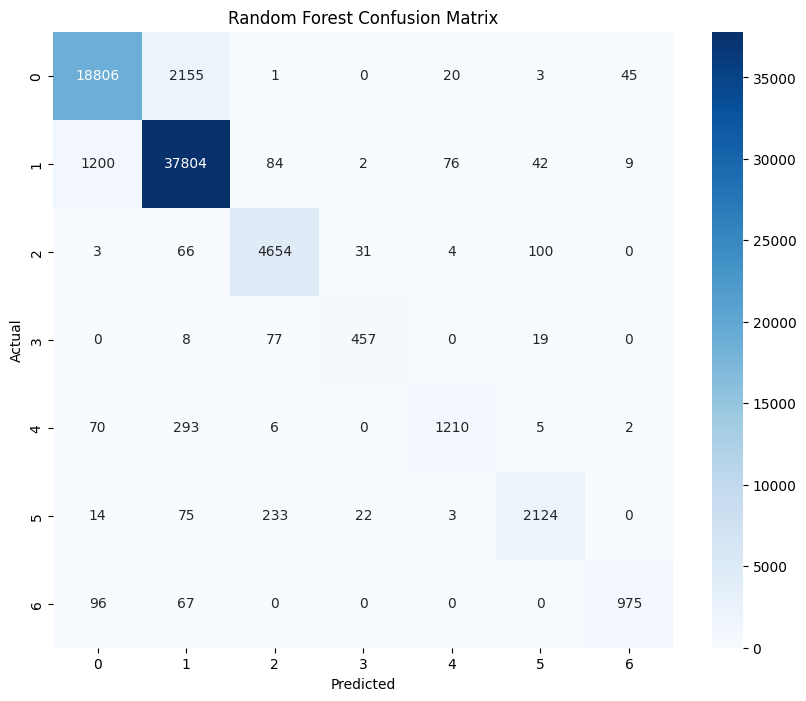

In [21]:
cm_rf = confusion_matrix(y_test_original, rf_test_pred_original)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_confusion_matrix.png')
plt.show()

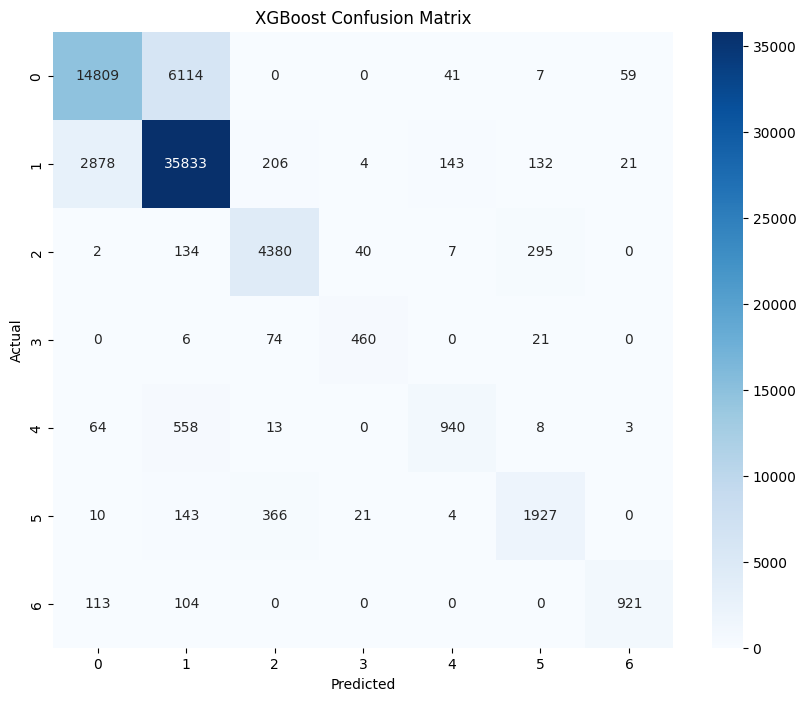

In [22]:
cm_xgb = confusion_matrix(y_test_original, xgb_test_pred_original)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('xgb_confusion_matrix.png')
plt.show()

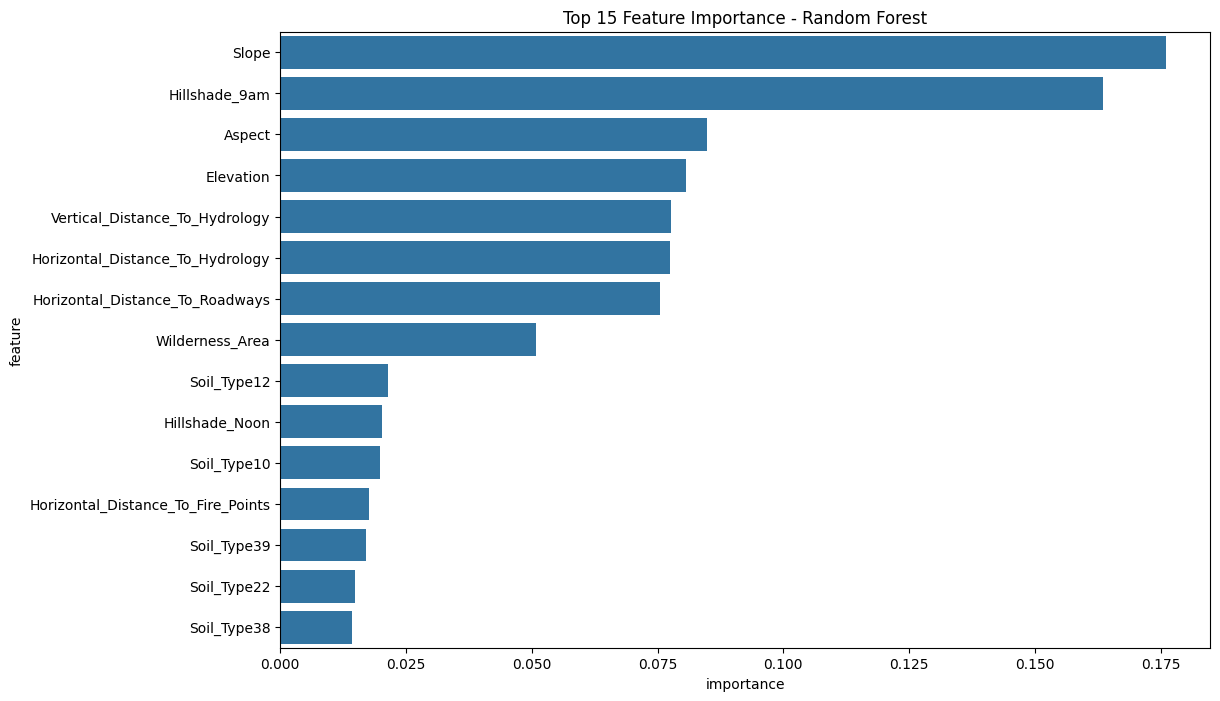

In [23]:
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_feature_importance_df.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.savefig('rf_feature_importance.png')
plt.show()

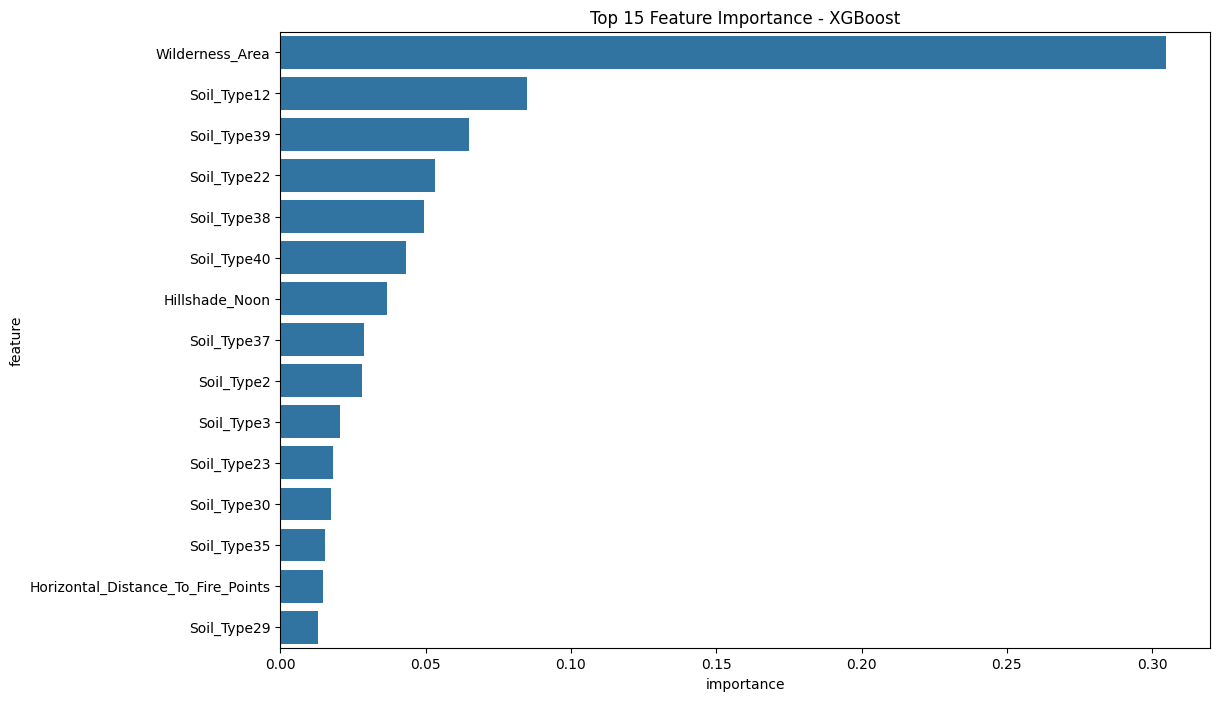

In [24]:
xgb_feature_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=xgb_feature_importance_df.head(15))
plt.title('Top 15 Feature Importance - XGBoost')
plt.savefig('xgb_feature_importance.png')
plt.show()


In [25]:

print("=== Model Comparison ===")
print("\nRandom Forest Training Accuracy:", accuracy_score(y_train_original, rf_train_pred_original))
print("Random Forest Test Accuracy:", accuracy_score(y_test_original, rf_test_pred_original))
print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test_original, rf_test_pred_original))

print("\nXGBoost Training Accuracy:", accuracy_score(y_train_original, xgb_train_pred_original))
print("XGBoost Test Accuracy:", accuracy_score(y_test_original, xgb_test_pred_original))
print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test_original, xgb_test_pred_original))

=== Model Comparison ===

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9318242756946699

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.93      0.89      0.91     21030
         2.0       0.93      0.96      0.95     39217
         3.0       0.92      0.96      0.94      4858
         4.0       0.89      0.81      0.85       561
         5.0       0.92      0.76      0.83      1586
         6.0       0.93      0.86      0.89      2471
         7.0       0.95      0.86      0.90      1138

    accuracy                           0.93     70861
   macro avg       0.92      0.87      0.90     70861
weighted avg       0.93      0.93      0.93     70861


XGBoost Training Accuracy: 0.8489062941010443
XGBoost Test Accuracy: 0.8364262429262923

XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.83      0.70      0.76     21030
  